In [32]:
import pandas as pd
import os
import numpy as np
from scipy.stats import pearsonr

In [4]:
top15_cities = {
    'New York-Newark-Jersey City, NY-NJ-PA': 35620, 
    'Los Angeles-Long Beach-Anaheim, CA': 31080,
    'Chicago-Naperville-Elgin, IL-IN-WI': 16980,
    'Dallas-Fort Worth-Arlington, TX': 19100,
    'Houston-The Woodlands-Sugar Land, TX': 26420,
    'Washington-Arlington-Alexandria, DC-VA-MD-WV': 47900,
    'Miami-Fort Lauderdale-Pompano Beach, FL': 33100,
    'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD': 37980,
    'Atlanta-Sandy Springs-Alpharetta, GA': 12060,
    'Phoenix-Mesa-Chandler, AZ': 38060,
    'Boston-Cambridge-Newton, MA-NH': 14460,
    'San Francisco-Oakland-Berkeley, CA': 41860,
    'Riverside-San Bernardino-Ontario, CA': 40140,
    'Detroit-Warren-Dearborn, MI': 19820,
    'Seattle-Tacoma-Bellevue, WA': 42660
    }

columns_drop = ['002', '003', '011', '014', '022', '023', '039', '048', '049', '050', '051','052', '053']

rename_col = {
'001' : 'PPL1Y',
'004' : 'Age_18T24',
'005' : 'Age_25T34',
'006' : 'Age_35T44',
'007' : 'Age_45T54',
'008' : 'Age_55T64',
'009' : 'Age_65T74',
'010' : 'Age_75T',
'012' : 'Gender_Male',
'013' : 'Gender_Female',
'015' : 'Race_White',
'016' : 'Race_Black',
'017' : 'Race_AI_AN',
'018' : 'Race_Asian',
'019' : 'Race_NH_OPI',
'020' : 'Race_Other',
'021' : 'Race_Mixed',
'024' : 'Citizen_Native',
'025' : 'Citizen_Foreign_Born',
'026' : 'Citizen_Naturalized',
'027' : 'Citizen_NotUS',
'034' : 'Edu_Less_High',
'035' : 'Edu_High_Grad',
'036' : 'Edu_Some_College',
'037' : 'Edu_Bachelor',
'038' : 'Edu_Grad_Prof',
'040' : 'Income_1k',
'041' : 'Income_15k',
'042' : 'Income_25k',
'043' : 'Income_35k',
'044' : 'Income_50k',
'045' : 'Income_65k',
'046' : 'Income_75k',
'047' : 'Income_75k+',
'054' : 'Housing_Owner',
'055' : 'Housing_Rental',
}

transform_col = {
    'PPL1Y': ['PPL1Y'], 
    'AGE18UP': ['Age_18T24', 'Age_25T34', 'Age_35T44', 'Age_45T54', 'Age_55T64', 'Age_65T74'], 
    'MALE': ['Gender_Male'],
    'FEMALE': ['Gender_Female'], 
    'WHITE': ['Race_White'], 
    'OTHER_RACE': ['Race_Black', 'Race_AI_AN', 'Race_Asian', 'Race_NH_OPI', 'Race_Other', 'Race_Mixed'], 
    'CITIZENSHIP': ['Citizen_Native', 'Citizen_Foreign_Born', 'Citizen_Naturalized'], 
    'FOREIGNER': ['Citizen_NotUS'],
    'EDU_LOW': ['Edu_Less_High', 'Edu_High_Grad'], 
    'EDU_MID': ['Edu_Some_College', 'Edu_Bachelor'], 
    'EDU_HIGH': ['Edu_Grad_Prof'], 
    'INCOME_LOW': ['Income_1k', 'Income_15k', 'Income_25k', 'Income_35k'], 
    'INCOME_MID': ['Income_65k', 'Income_75k'],
    'INCOME_HIGH': ['Income_75k+'], 
    'HOUSE_OWNER': ['Housing_Owner'], 
    'HOUSE_RENTAL': ['Housing_Rental']
}

total_ppl = {f'S0701_C01_{key}E': f'TT_{val}' for key, val in rename_col.items()}
within_county = {f'S0701_C02_{key}E': f'SC_{val}' for key, val in rename_col.items()}
within_state = {f'S0701_C03_{key}E': f'SS_{val}' for key, val in rename_col.items()}
diff_state = {f'S0701_C04_{key}E': f'DS_{val}' for key, val in rename_col.items()}

all_column = total_ppl | within_county | within_state | diff_state

total_ppl = {f'TT_{key}': list(map(lambda x: 'TT_' + x, val)) for key, val in transform_col.items()}
within_county = {f'SC_{key}': list(map(lambda x: 'SC_' + x, val)) for key, val in transform_col.items()}
within_state = {f'SS_{key}': list(map(lambda x: 'SS_' + x, val)) for key, val in transform_col.items()}
diff_state = {f'DS_{key}': list(map(lambda x: 'DS_' + x, val)) for key, val in transform_col.items()}

all_transform_column = total_ppl | within_county | within_state | diff_state

In [25]:

migration_data = pd.read_csv('./Output/final/MIGRATION_ZCTA.csv')
occupation_data = pd.read_csv(f'./Output/final/OCCUPATION_ZCTA.csv')

merged_data = pd.merge(migration_data, occupation_data, how='inner', on=['GEO_ID', 'year']).replace(np.inf, np.nan)


In [27]:
top15_cities_migration = merged_data.loc[merged_data['cbsa'].isin(top15_cities.values()) & merged_data['cbsa'].isna().apply(lambda x: not x)]
top15_cities_migration

,year,cbsa,GEO_ID,TT_PPL1Y,TT_AGE_LOW,TT_AGE_MID,TT_AGE_HIGH,TT_GENDER_0,TT_GENDER_1,TT_RACE_0,...,TM_EDU_LOW_LAG_4,TM_EDU_MID_LAG_4,TM_EDU_HIGH_LAG_4,TM_INCOME_LOW_LAG_4,TM_INCOME_MID_LAG_4,TM_INCOME_HIGH_LAG_4,TM_HOUSE_0_LAG_4,TM_HOUSE_1_LAG_4,REMOTE,REMOTE_PPL
158,2016,14460,1431.0,0.538486,-3.630363,1.771654,8.368201,3.902751,-2.760351,0.876623,...,-78.740157,34.090909,284.375000,-11.111111,NaN,NaN,6.521739,-16.716418,0.347777,0.041227
159,2016,14460,1432.0,0.867940,11.216216,-2.376347,0.193050,3.611491,-1.747522,-0.407732,...,-2.816901,43.670886,51.219512,17.509728,33.552632,75.438596,31.034483,25.125628,0.417166,0.116929
160,2016,14460,1434.0,3.498191,15.099010,5.168539,49.650350,6.685237,-17.117117,2.304965,...,-3.338898,-45.367412,55.555556,-13.942308,-45.643154,-100.000000,-100.000000,NaN,0.421948,0.069930
161,2016,14460,1434.0,3.498191,15.099010,5.168539,49.650350,6.685237,-17.117117,2.304965,...,-3.338898,-45.367412,55.555556,-13.942308,-45.643154,-100.000000,-100.000000,NaN,0.421948,0.069930
167,2016,14460,1450.0,0.560275,12.262774,-1.043383,0.355450,-2.128434,3.214222,0.787325,...,-61.139896,4.964539,-14.492754,-12.741313,-57.322176,12.500000,8.000000,-41.988950,0.487847,0.129363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436112,2022,42660,98467.0,-1.290408,-7.900147,2.623069,5.741935,-0.286650,-2.225614,-5.824420,...,7.124682,2.768166,-9.183673,-3.308431,-6.018519,41.176471,8.695652,-8.011869,0.386637,0.140153
436113,2022,42660,98498.0,-2.534489,-5.170372,2.010050,0.865672,1.040454,-5.867191,-9.994889,...,-4.761905,-7.228916,24.137931,1.196809,-0.746269,-12.790698,-3.669725,9.848485,0.368569,0.083504
436114,2022,42660,98499.0,2.194812,3.924011,-1.099744,3.416696,2.260891,2.130453,-0.695494,...,-14.527845,-2.702703,-66.115702,-8.988764,6.756757,-25.609756,4.651163,-13.268608,0.309867,0.046901
436166,2022,42660,98558.0,17.647059,NaN,5.555556,0.000000,2.631579,61.538462,50.000000,...,-91.250000,20.493359,NaN,-5.753885,NaN,NaN,NaN,NaN,0.000000,0.000000


In [28]:
merged_data.describe()[[col for col in merged_data.columns if 'SS_' in col and 'LAG' not in col]]

,SS_PPL1Y,SS_AGE_LOW,SS_AGE_MID,SS_AGE_HIGH,SS_GENDER_0,SS_GENDER_1,SS_RACE_0,SS_RACE_1,SS_CITIZENSHIP_0,SS_CITIZENSHIP_1,SS_EDU_LOW,SS_EDU_MID,SS_EDU_HIGH,SS_INCOME_LOW,SS_INCOME_MID,SS_INCOME_HIGH,SS_HOUSE_0,SS_HOUSE_1
count,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000
mean,3.464594,13.462326,7.672609,1.230957,3.554128,3.280121,3.365092,19.667303,8.659653,2.916797,5.787947,5.712382,2.643170,13.678041,4.625326,2.076327,1.995277,6.349879
std,4.363842,16.160373,11.124619,3.396917,4.757932,4.568652,4.367190,35.842779,18.645015,11.245859,9.708837,8.628622,7.412803,15.941997,9.513797,5.246191,3.055953,9.690371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.400000,0.000000,0.000000,0.800000,0.700000,0.900000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,2.900000,0.000000,0.000000,0.200000,0.000000
50%,2.600000,9.400000,4.800000,0.000000,2.500000,2.300000,2.500000,1.400000,3.300000,0.000000,3.100000,3.600000,0.000000,10.200000,0.600000,0.000000,1.300000,3.600000
75%,4.500000,19.000000,10.200000,1.400000,4.700000,4.300000,4.400000,23.000000,7.900000,0.000000,7.500000,7.700000,2.700000,19.100000,5.800000,2.400000,2.700000,8.500000
max,100.000000,200.000000,215.200000,100.000000,100.000000,100.000000,100.000000,500.000000,300.000000,100.000000,200.000000,200.000000,100.000000,355.900000,200.000000,100.000000,100.000000,100.000000


In [29]:
merged_data.describe()[[col for col in merged_data.columns if 'SC_' in col and 'LAG' not in col]]

,SC_PPL1Y,SC_AGE_LOW,SC_AGE_MID,SC_AGE_HIGH,SC_GENDER_0,SC_GENDER_1,SC_RACE_0,SC_RACE_1,SC_CITIZENSHIP_0,SC_CITIZENSHIP_1,SC_EDU_LOW,SC_EDU_MID,SC_EDU_HIGH,SC_INCOME_LOW,SC_INCOME_MID,SC_INCOME_HIGH,SC_HOUSE_0,SC_HOUSE_1
count,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000
mean,5.323148,18.711216,11.950971,2.040361,5.312195,5.311459,5.155663,25.143192,12.426818,4.431029,9.402240,8.381713,3.080545,21.539477,7.384744,3.021160,3.139930,11.054005
std,4.925483,17.998452,12.884165,4.689552,5.304721,5.237568,5.105705,38.456864,20.262902,12.807073,10.654693,9.873877,7.211289,19.387950,11.424018,5.976012,3.788676,11.575068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.100000,4.300000,2.400000,0.000000,1.800000,1.800000,1.900000,0.000000,2.300000,0.000000,1.600000,1.300000,0.000000,7.400000,0.000000,0.000000,0.800000,1.300000
50%,4.600000,15.700000,9.500000,0.400000,4.400000,4.500000,4.300000,4.200000,5.800000,0.000000,7.000000,6.300000,0.000000,18.300000,3.300000,0.000000,2.500000,9.200000
75%,7.400000,27.800000,17.300000,2.900000,7.500000,7.500000,7.200000,37.800000,14.600000,1.300000,13.700000,12.100000,4.100000,30.900000,10.900000,4.300000,4.400000,16.500000
max,100.000000,200.000000,300.000000,100.000000,100.000000,100.000000,100.000000,394.000000,300.000000,100.000000,200.000000,200.000000,100.000000,376.300000,200.000000,100.000000,100.000000,100.000000


In [30]:
merged_data.describe()[[col for col in merged_data.columns if 'DS_' in col and 'LAG' not in col]]

,DS_PPL1Y,DS_AGE_LOW,DS_AGE_MID,DS_AGE_HIGH,DS_GENDER_0,DS_GENDER_1,DS_RACE_0,DS_RACE_1,DS_CITIZENSHIP_0,DS_CITIZENSHIP_1,DS_EDU_LOW,DS_EDU_MID,DS_EDU_HIGH,DS_INCOME_LOW,DS_INCOME_MID,DS_INCOME_HIGH,DS_HOUSE_0,DS_HOUSE_1
count,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000,436926.000000
mean,1.971223,6.777389,4.644110,0.957778,1.975814,1.941104,2.019883,11.743039,6.016257,2.387186,2.887013,3.664800,2.158391,8.208053,2.854780,1.620362,1.113283,3.665411
std,3.698682,12.161398,9.580309,3.318512,3.873117,3.953646,4.132177,27.834537,16.958036,10.244478,7.856567,7.667946,6.576637,15.590979,8.427634,5.042077,2.488962,7.891260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.100000,2.600000,1.800000,0.000000,1.000000,0.900000,1.000000,0.000000,1.300000,0.000000,0.700000,1.400000,0.000000,4.100000,0.000000,0.000000,0.500000,1.000000
75%,2.400000,8.600000,5.600000,0.700000,2.400000,2.400000,2.400000,8.600000,4.400000,0.000000,3.100000,4.500000,1.800000,10.100000,2.600000,1.500000,1.400000,4.400000
max,100.000000,200.000000,246.500000,100.000000,100.000000,100.000000,100.000000,568.300000,297.400000,100.000000,200.000000,200.000000,100.000000,393.500000,200.000000,100.000000,100.000000,100.000000


In [34]:
rho = top15_cities_migration.groupby('cbsa').corr()
pval = top15_cities_migration.groupby('cbsa').corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
top15_corr_table = rho.round(2).astype(str) + p
top15_corr_table

In [8]:
top15_corr = {'cbsa': sorted(top15_cities.values())}
for col in top15_corr_table.columns:
    if col != 'YEAR' or col != 'REMOTE':
        top15_corr[col] = top15_corr_table.sort_index().loc(axis=0)[:, col]['REMOTE'].values
top15_corr_remote = pd.DataFrame(top15_corr).drop(columns=['REMOTE', 'YEAR'])
top15_corr_remote

,cbsa,SC_PPL1Y,SC_Age_18T24,SC_Age_25T34,SC_Age_35T44,SC_Age_45T54,SC_Age_55T64,SC_Age_65T74,SC_Age_75T,SC_Gender_Male,...,DS_Income_15k,DS_Income_25k,DS_Income_35k,DS_Income_50k,DS_Income_65k,DS_Income_75k,DS_Income_75k+,DS_Housing_Owner,DS_Housing_Rental,REMOTE_PPL
0,12060,0.5,0.41,0.47,0.42,0.51,-0.1,-0.75,-0.65,0.49,...,-0.55,-0.73,-0.75,-0.74,-0.71,-0.65,-0.88,0.63,0.44,0.95
1,14460,0.55,0.41,0.59,0.54,0.48,0.63,-0.78,-0.83,0.53,...,-0.51,-0.63,-0.53,-0.69,-0.59,-0.57,0.74,0.3,0.6,0.95*
2,16980,0.42,0.4,0.46,0.4,0.34,0.33,-0.56,-0.98*,0.42,...,-0.6,-0.32,-0.45,-0.52,-0.61,-0.47,-0.36,0.59,0.46,0.98*
3,19100,0.47,0.36,0.48,0.46,0.41,0.38,-0.88,-0.93,0.47,...,-0.5,-0.41,-0.68,-0.74,-0.62,-0.62,-0.8,0.56,0.44,0.95*
4,19820,0.39,0.32,0.37,0.36,0.33,0.32,-0.38,0.24,0.36,...,-0.62,-0.68,-0.46,-0.45,-0.56,-0.51,-0.5,0.59,-0.93,0.99**
5,26420,0.61,0.62,0.61,0.61,0.55,0.65,-0.92,-0.87,0.61,...,-0.69,-0.75,-0.73,-0.63,-0.65,-0.7,-0.67,0.87,-0.57,0.97*
6,31080,0.58,0.52,0.62,0.61,0.53,0.53,0.38,0.06,0.58,...,-0.66,-0.59,-0.69,-0.71,-0.74,-0.63,-0.72,0.23,0.52,-0.16
7,33100,0.44,0.34,0.48,0.44,0.41,0.37,0.38,0.2,0.45,...,-0.52,-0.69,-0.45,-0.69,-0.57,-0.48,0.88,0.56,0.56,0.57
8,35620,0.65,0.62,0.66,0.69,0.64,0.78,-0.74,-0.72,0.64,...,-0.65,-0.64,-0.65,-0.66,-0.7,-0.67,-0.03,0.53,-0.64,0.85
9,37980,0.5,0.47,0.5,0.42,0.29,0.19,-0.64,-0.82,0.48,...,-0.6,-0.67,-0.64,-0.53,-0.48,-0.54,-0.4,0.98*,0.28,0.99**


In [6]:
top15_corr = {'cbsa': sorted(top15_cities.values())}
for col in top15_corr_table.columns:
    if col != 'YEAR' or col != 'REMOTE_PPL':
        top15_corr[col] = top15_corr_table.sort_index().loc(axis=0)[:, col]['REMOTE_PPL'].values
top15_corr_remote_ppl = pd.DataFrame(top15_corr).drop(columns=['REMOTE_PPL', 'YEAR'])
top15_corr_remote_ppl

,cbsa,SC_PPL1Y,SC_Age_18T24,SC_Age_25T34,SC_Age_35T44,SC_Age_45T54,SC_Age_55T64,SC_Age_65T74,SC_Age_75T,SC_Gender_Male,...,DS_Income_15k,DS_Income_25k,DS_Income_35k,DS_Income_50k,DS_Income_65k,DS_Income_75k,DS_Income_75k+,DS_Housing_Owner,DS_Housing_Rental,REMOTE
0,12060,0.72,0.65,0.71,0.66,0.72,0.22,-0.91,-0.84,0.72,...,-0.77,-0.91,-0.87,-0.91,-0.87,-0.84,-0.93,0.82,0.68,0.95
1,14460,0.65,0.52,0.69,0.64,0.6,0.77,-0.84,-0.91,0.64,...,-0.64,-0.73,-0.64,-0.73,-0.66,-0.66,0.91,0.47,0.71,0.95*
2,16980,0.56,0.54,0.59,0.54,0.49,0.48,-0.4,-0.96*,0.55,...,-0.72,-0.46,-0.59,-0.64,-0.72,-0.6,-0.51,0.7,0.59,0.98*
3,19100,0.71,0.63,0.72,0.7,0.66,0.62,-0.98*,-0.99*,0.71,...,-0.73,-0.66,-0.86,-0.9,-0.82,-0.83,-0.93,0.77,0.69,0.95*
4,19820,0.48,0.42,0.46,0.45,0.43,0.42,-0.29,0.34,0.46,...,-0.7,-0.75,-0.55,-0.54,-0.64,-0.59,-0.58,0.65,-0.88,0.99**
5,26420,0.8,0.8,0.79,0.79,0.75,0.82,-0.89,-0.97*,0.79,...,-0.85,-0.88,-0.88,-0.8,-0.82,-0.86,-0.84,0.96*,-0.35,0.97*
6,31080,0.57,0.62,0.55,0.54,0.6,0.61,0.65,0.75,0.58,...,-0.51,-0.59,-0.46,-0.48,-0.43,-0.53,-0.48,0.84,0.58,-0.16
7,33100,0.95*,0.94,0.96*,0.95*,0.96*,0.93,0.93,0.9,0.95*,...,-0.94,-0.87,-0.94,-0.98*,-0.95*,-0.93,0.89,0.97*,0.96*,0.57
8,35620,0.54,0.49,0.55,0.58,0.56,0.75,-0.64,-0.57,0.53,...,-0.54,-0.53,-0.52,-0.54,-0.56,-0.56,0.12,0.63,-0.47,0.85
9,37980,0.56,0.53,0.56,0.48,0.34,0.28,-0.7,-0.85,0.54,...,-0.65,-0.71,-0.69,-0.59,-0.55,-0.6,-0.46,0.98*,0.34,0.99**


In [9]:
top15_corr_remote.to_csv('corr_remote.csv', index=None)
top15_corr_remote_ppl.to_csv('corr_remote_ppl.csv', index=None)

In [4]:
import matplotlib.pyplot as plt

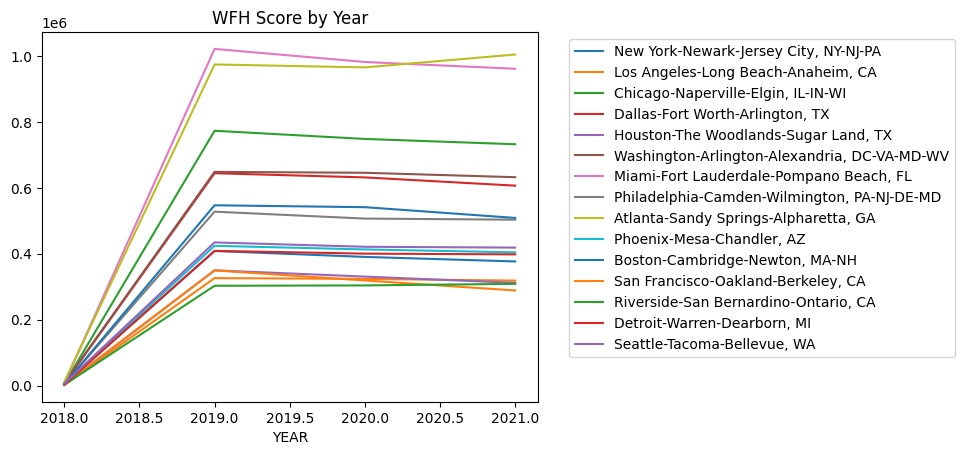

In [20]:
wfh_by_year = top15_cities_migration.pivot(index = 'YEAR', values= 'SC_PPL1Y', columns = 'cbsa')
wfh_by_year.plot()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', labels = top15_cities.keys())
plt.title('WFH Score by Year')
plt.show()

In [24]:
def plot_data(col):
    top15_cities_historical.set_index('YEAR').groupby('cbsa')[col].plot()
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', labels = top15_cities.keys())
    plt.title(col)
    plt.show()

In [30]:
top15_corr_remote[['cbsa'] + [move + '_Age_45T54' for move in ['SC', 'SS', 'DS']]]

,cbsa,SC_Age_45T54,SS_Age_45T54,DS_Age_45T54
0,12060,0.51,0.58,-0.73
1,14460,0.48,-0.57,-0.6
2,16980,0.34,-0.38,-0.55
3,19100,0.41,0.77,-0.72
4,19820,0.33,0.45,-0.6
5,26420,0.55,0.01,-0.74
6,31080,0.53,-0.73,-0.67
7,33100,0.41,-0.4,-0.55
8,35620,0.64,-0.64,-0.65
9,37980,0.29,-0.36,-0.59


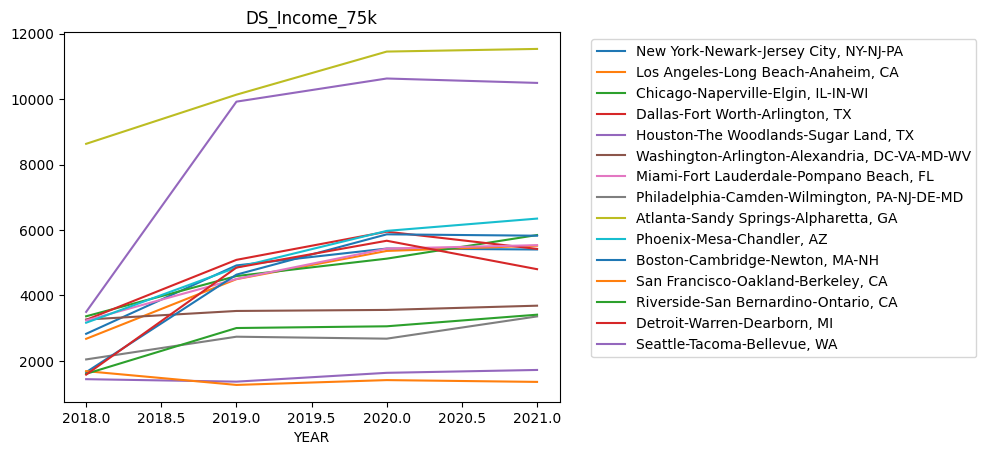

In [26]:
plot_data('DS_Income_75k')